In [1]:
import tensorflow as tf

# Model Training #

In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1100 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0780 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0605 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0511 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0431 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0285 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.023

# Accuracy #

In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 761us/step - loss: 0.1139 - accuracy: 0.9732
0.11392372101545334 0.9732000231742859


(28, 28)

# Saving The Model #

In [15]:
model.save('numbers.model')

INFO:tensorflow:Assets written to: numbers.model\assets


INFO:tensorflow:Assets written to: numbers.model\assets


# Test Predictions #

In [45]:
new_model = tf.keras.models.load_model('numbers.model')
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 755us/step


In [46]:
import numpy as np
print(np.argmax(predictions[0]))

7


# User Images #

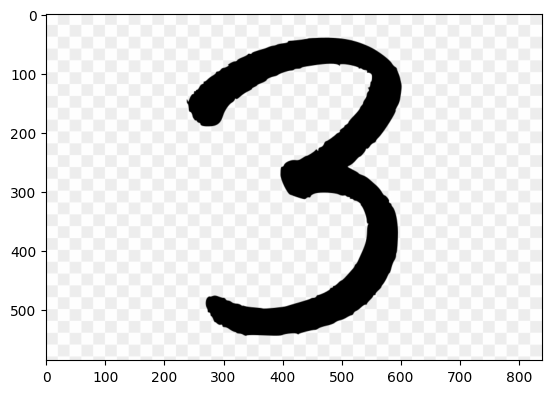

In [106]:
import cv2
import matplotlib.pyplot as plt

img_file = 'test2.png'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')
plt.show()

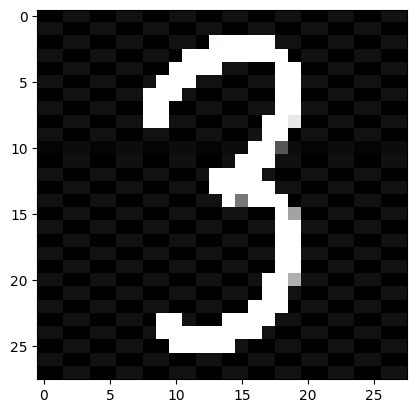

In [107]:
img_resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

plt.imshow(img_resized, cmap = 'gray')
plt.show()

In [108]:
prediction = new_model.predict(np.array([img_resized]))
print(np.argmax(prediction[0]))

1/1 [==============================] - 0s 14ms/step
3
